In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import networkx as nx
import pickle
import numpy as np
import operator

In [2]:
with open('stanford_dog_cnn_inception.pickle', 'rb') as handle:
    b = pickle.load(handle)
coefficients = np.array(b.values())

In [3]:
catmapfilename='breed_map.list'
catmapfile = open(catmapfilename,'r')
categoryMap = dict()
for line in catmapfile.readlines():
    ls = line.split()
    category = ls[0]
    breed = ls[1]
    categoryMap[category] = breed

categoryIndex = dict(zip(categoryMap.keys(),range(len(categoryMap))))
nb_classes = len(categoryMap)

In [4]:
input_photos = []
breedlist = []
photo_ids = []
posfilename = "positives_shuf.txt"
inputdirname = "CroppedDogs/"
posfile = open(posfilename,'r')
for line in posfile.readlines():
    infile = line.strip()
    ls0 = infile.split("/")
    ls1 = ls0[1].split("_")
    p_id = ls0[1].split(".")[0]
    category = ls1[0]
    breedlist.append(categoryIndex[category])
    photo_ids.append(p_id)

In [72]:
nToUse = len(photo_ids)
testFraction = 1.0/10.0
nTest = int(testFraction*nToUse)

labels = np.array(breedlist)

y_test = labels[:nTest]
X_labels = photo_ids[:nTest]

In [73]:
smallCoefficients = coefficients[:nTest,:]

In [75]:
print smallCoefficients.shape,len(X_labels)

(2212, 120) 2212


In [76]:
print len(X_labels),coefficients.shape

2212 (7375, 120)


In [78]:
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances
similarities = pairwise_distances(smallCoefficients)

In [79]:
similaritiesList = similarities.tolist()

In [80]:
nNodes = similarities.shape[0]
edges = []
for i in range(0,nNodes):
    for j in range(i+1,nNodes):
        edges.append((i,j,similaritiesList[i][j]))
nodes = range(0,nNodes)

In [81]:
sorted_edges = sorted(edges,key=operator.itemgetter(2))

In [82]:
print sorted_edges[0][2],sorted_edges[-1][2]

0.0 1.4142127037


In [65]:
#sorted_edges_small = sorted_edges[:1000000]
sorted_edges_small = [(sorted_edges[i][0],sorted_edges[i][1],sorted_edges[i][2] * 1000) for i in range(0,2000000)]

In [83]:
edgeList = [sorted_edges[i][2] for i in range(0,len(sorted_edges))]
print len(edgeList)

2445366


(array([   8289.,    6075.,   17747.,   43673.,   85761.,  157431.,
         288710.,  603667.,  572445.,  661568.]),
 array([ 0.        ,  0.14142127,  0.28284254,  0.42426381,  0.56568508,
         0.70710635,  0.84852762,  0.98994889,  1.13137016,  1.27279143,
         1.4142127 ]),
 <a list of 10 Patch objects>)

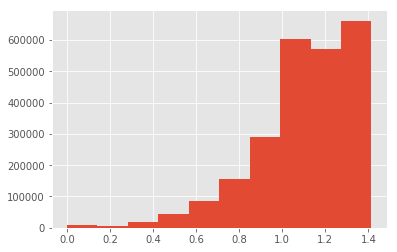

In [84]:
plt.hist(edgeList)

In [85]:
graph = nx.Graph()

In [86]:
graph.add_nodes_from(nodes)

In [87]:
print len(edges)

2445366


In [88]:
graph.add_weighted_edges_from(sorted_edges)

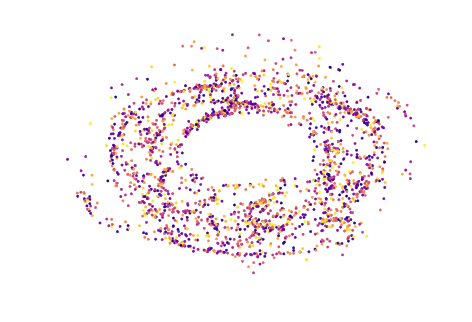

In [91]:
nx.draw(graph,node_color=y_test,node_size=5,width=0.0,cmap=plt.cm.plasma,prog='sfdp')
plt.savefig("network_graph.jpg") 